In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Modelling
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [6]:
df = pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Making math_score as our target
X = df.drop(['math_score'],axis=1)
y = df['math_score']

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = X.select_dtypes(exclude='O').columns
cat_features = X.select_dtypes(include='O').columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("One Hot Encoder", cat_transformer, cat_features),
    ("Standard Scaler", num_transformer, num_features)
])

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
# Train Test Split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
def eval_model(true,pred):
    r2 = r2_score(true,pred)
    mse = mean_squared_error(true,pred)
    mae = mean_absolute_error(true,pred)
    rmse = np.sqrt(mean_squared_error(true,pred))
    return mae, rmse, r2, mse


In [18]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge": Ridge(),
    "Support Vector" : SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbor" : KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Adaboost": AdaBoostRegressor(),
    "Catboost": CatBoostRegressor(),
    "XGBoost": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Results
    train_mae, train_rmse, train_r2, train_mse = eval_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2, test_mse = eval_model(y_test, y_test_pred)

    #Train results
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Data")
    print('- R2 Score: {:.4f}'.format(train_r2))
    print('- MSE: {:.4f}'.format(train_mse))
    print('- MAE: {:.4f}'.format(train_mae))
    print('- RMSE: {:.4f}'.format(train_rmse))

    print("----****----")

    print("Model Performance for Testing Data")
    print('- R2 Score: {:.4f}'.format(test_r2))
    print('- MSE: {:.4f}'.format(test_mse))
    print('- MAE: {:.4f}'.format(test_mae))
    print('- RMSE: {:.4f}'.format(test_rmse))
    
    r2_list.append(test_r2)
    
    print("-"*30)
    print("\n")

Linear Regression
Model Performance for Training Data
- R2 Score: 0.8743
- MSE: 28.3485
- MAE: 4.2671
- RMSE: 5.3243
----****----
Model Performance for Testing Data
- R2 Score: 0.8803
- MSE: 29.1167
- MAE: 4.2158
- RMSE: 5.3960
------------------------------


Lasso
Model Performance for Training Data
- R2 Score: 0.8071
- MSE: 43.4784
- MAE: 5.2063
- RMSE: 6.5938
----****----
Model Performance for Testing Data
- R2 Score: 0.8253
- MSE: 42.5064
- MAE: 5.1579
- RMSE: 6.5197
------------------------------


Ridge
Model Performance for Training Data
- R2 Score: 0.8743
- MSE: 28.3378
- MAE: 4.2650
- RMSE: 5.3233
----****----
Model Performance for Testing Data
- R2 Score: 0.8806
- MSE: 29.0563
- MAE: 4.2111
- RMSE: 5.3904
------------------------------


Support Vector
Model Performance for Training Data
- R2 Score: 0.8081
- MSE: 43.2570
- MAE: 4.8692
- RMSE: 6.5770
----****----
Model Performance for Testing Data
- R2 Score: 0.7286
- MSE: 66.0420
- MAE: 5.4015
- RMSE: 8.1266
----------------

In [19]:
# RESULTS
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
6,Random Forest,0.856013
7,Adaboost,0.851727
8,Catboost,0.851632
9,XGBoost,0.827797
1,Lasso,0.825320
5,K-Nearest Neighbor,0.783813
4,Decision Tree,0.743588
3,Support Vector,0.728600


In [20]:
# Linear Regression
lin_model = LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("The accuracy of the model is {:.2f}".format(score))

The accuracy of the model is 88.03


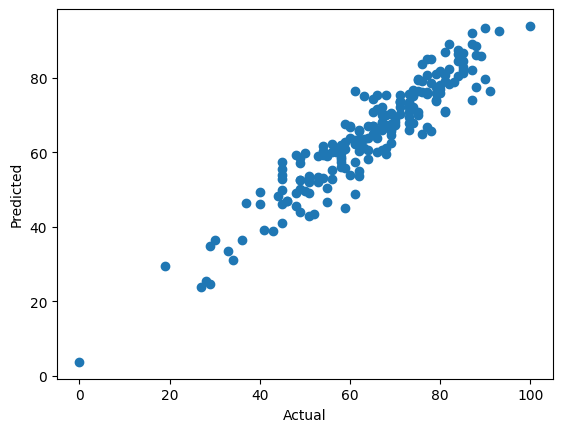

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

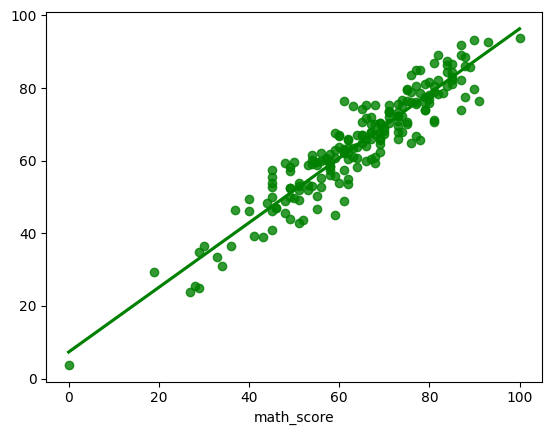

In [26]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='green')

In [28]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, "Difference": y_test-y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
